In [53]:
import numpy as np 
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# Read CSV files
penguin_data = pd.read_csv("penguins.csv")
abalone_data = pd.read_csv("abalone.csv")

In [4]:
# Convert the data to numpy 
np_data_penguin = penguin_data.to_numpy()
np_data_abalone = abalone_data.to_numpy()

In [5]:
# Convert it to 1 hot vector -- Penguin Data
dummy_penguin_data = pd.get_dummies(penguin_data, columns=["island", "sex"])
# Print the Output
print(dummy_penguin_data)

    species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie              39.1             18.7                181   
1    Adelie              39.5             17.4                186   
2    Adelie              40.3             18.0                195   
3    Adelie              36.7             19.3                193   
4    Adelie              39.3             20.6                190   
..      ...               ...              ...                ...   
328  Gentoo              47.2             13.7                214   
329  Gentoo              46.8             14.3                215   
330  Gentoo              50.4             15.7                222   
331  Gentoo              45.2             14.8                212   
332  Gentoo              49.9             16.1                213   

     body_mass_g  island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  \
0           3750              0             0                 1           0   
1           3

In [6]:
# Convert features to Catogories  -- Penguin Data
le = preprocessing.LabelEncoder()
np_data_penguin[:,1] = le.fit_transform(np_data_penguin[:,1])
np_data_penguin[:,6] = le.fit_transform(np_data_penguin[:,6])
print(np_data_penguin)


[['Adelie' 2 39.1 ... 181 3750 1]
 ['Adelie' 2 39.5 ... 186 3800 0]
 ['Adelie' 2 40.3 ... 195 3250 0]
 ...
 ['Gentoo' 0 50.4 ... 222 5750 1]
 ['Gentoo' 0 45.2 ... 212 5200 0]
 ['Gentoo' 0 49.9 ... 213 5400 1]]


In [7]:
# Since all the features in abalone Data are numerical so no need to covert them

In [8]:
# Determine count of each type of specie -- Penguin Data
penguin_data_count = penguin_data["species"].value_counts()
# Find the Percentage -- Penguin Data
penguin_data_percentage = (penguin_data_count / len(penguin_data)) * 100

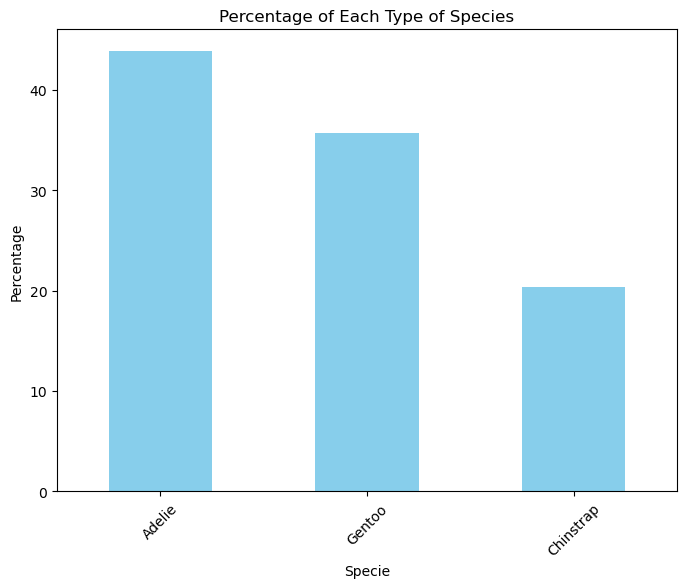

In [9]:
# Plot a Bar graph for Penguin -- Penguin Data
plt.figure(figsize=(8, 6))
penguin_data_percentage.plot(kind='bar', color='skyblue')
plt.title("Percentage of Each Type of Species")
plt.xlabel("Specie")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.savefig("penguin-classes.png")


In [10]:
# Determine count of each type of specie -- Abalone Data
abalone_data_count = abalone_data["Type"].value_counts()
# Find the Percentage -- Abalone Data
abalone_data_percentage = (abalone_data_count / len(abalone_data)) * 100

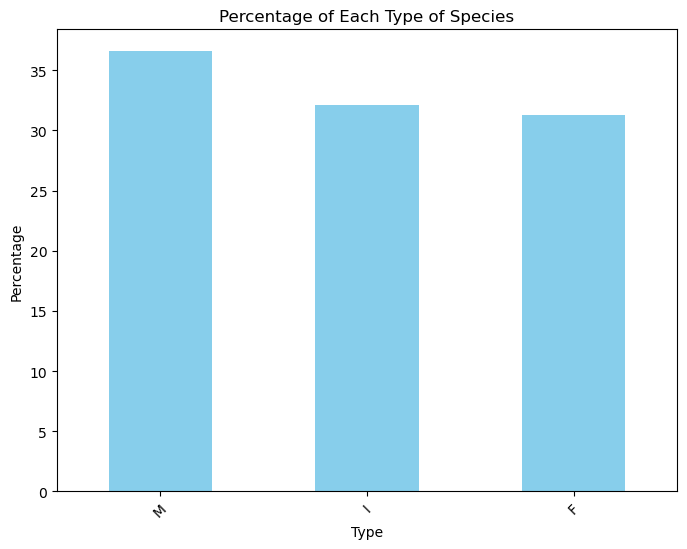

In [11]:
# Plot the graph -- Abalone Data
plt.figure(figsize=(8, 6))
abalone_data_percentage.plot(kind='bar', color='skyblue')
plt.title("Percentage of Each Type of Species")
plt.xlabel("Type")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.savefig("penguin-classes.png")

[Text(0.5769230769230769, 0.9375, 'x[3] <= 206.5\nentropy = 1.499\nsamples = 249\nvalue = [112, 46, 91]'),
 Text(0.38461538461538464, 0.8125, 'x[1] <= 44.65\nentropy = 0.899\nsamples = 154\nvalue = [111, 42, 1]'),
 Text(0.23076923076923078, 0.6875, 'x[2] <= 17.35\nentropy = 0.222\nsamples = 112\nvalue = [108, 4, 0]'),
 Text(0.15384615384615385, 0.5625, 'x[1] <= 40.75\nentropy = 0.555\nsamples = 31\nvalue = [27, 4, 0]'),
 Text(0.07692307692307693, 0.4375, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0, 0]'),
 Text(0.23076923076923078, 0.4375, 'x[4] <= 3650.0\nentropy = 0.722\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(0.15384615384615385, 0.3125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.3076923076923077, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3076923076923077, 0.5625, 'entropy = 0.0\nsamples = 81\nvalue = [81, 0, 0]'),
 Text(0.5384615384615384, 0.6875, 'x[4] <= 4125.0\nentropy = 0.531\nsamples = 42\nvalue = [3, 38, 1]'),
 Text(0.46153846153846156, 

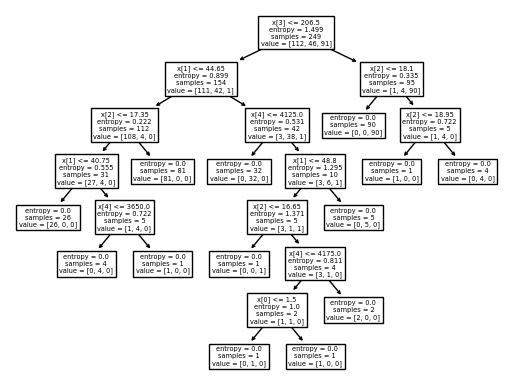

In [44]:
# Split the data between training and testing -- Penguin Data
penguin_x_train, penguin_x_test, pengiun_y_train, penguin_y_test = train_test_split(np_data_penguin[:,1:6], np_data_penguin[:,0])

# Create and print the decision tree --Penguin
dtc_penguin = tree.DecisionTreeClassifier(criterion="entropy") 
dtc_penguin.fit(penguin_x_train, pengiun_y_train) 
tree.plot_tree(dtc_penguin) 

In [47]:
# Split the data between training and testing -- Abalone Data
abalone_x_train, abalone_x_test, abalone_y_train, abalone_y_test = train_test_split(np_data_abalone[:,1:6], np_data_abalone[:,0])

# Create and print the decision tree -- Abalone Data
# Max-depth kept 3 for visualization
dtc_abalone = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3) 
dtc_abalone.fit(abalone_x_train,abalone_y_train) 
tree.plot_tree(dtc_abalone)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_params_'

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


[Text(0.6527777777777778, 0.9166666666666666, 'x[3] <= 206.5\ngini = 0.63\nsamples = 249\nvalue = [112, 46, 91]'),
 Text(0.4722222222222222, 0.75, 'x[1] <= 44.65\ngini = 0.406\nsamples = 154\nvalue = [111, 42, 1]'),
 Text(0.2777777777777778, 0.5833333333333334, 'x[1] <= 42.35\ngini = 0.069\nsamples = 112\nvalue = [108, 4, 0]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[2] <= 16.65\ngini = 0.02\nsamples = 101\nvalue = [100, 1, 0]'),
 Text(0.1111111111111111, 0.25, 'x[1] <= 39.3\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2222222222222222, 0.25, 'gini = 0.0\nsamples = 92\nvalue = [92, 0, 0]'),
 Text(0.3888888888888889, 0.4166666666666667, 'x[3] <= 189.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),


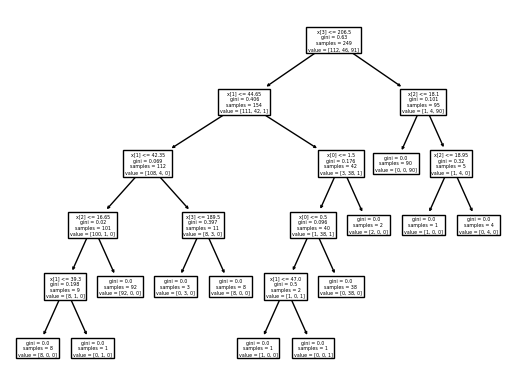

In [46]:
# Determine best combination of Hyper Parameters -- Penguin Data
# Define the Parameters
tree_param = {'criterion':['gini','entropy'],'max_depth' : [4,5,None],'min_samples_split': [2, 5, 10]}
# Pass the Parameters and model to GridSearchCV
grid_search_penguin = GridSearchCV(tree.DecisionTreeClassifier(),tree_param)
# Fit the Model to the Training Data
grid_search_penguin.fit(penguin_x_train,pengiun_y_train)
# Get the best estimate
best_dt = grid_search_penguin.best_estimator_
# Plot the tree
tree.plot_tree(best_dt)

[Text(0.5, 0.9, 'x[3] <= 0.743\ngini = 0.665\nsamples = 3132\nvalue = [985, 994, 1153]'),
 Text(0.25, 0.7, 'x[2] <= 0.102\ngini = 0.563\nsamples = 1436\nvalue = [247, 853, 336]'),
 Text(0.125, 0.5, 'x[1] <= 0.343\ngini = 0.366\nsamples = 561\nvalue = [25, 434, 102]'),
 Text(0.0625, 0.3, 'x[2] <= 0.073\ngini = 0.346\nsamples = 540\nvalue = [21, 426, 93]'),
 Text(0.03125, 0.1, 'gini = 0.234\nsamples = 142\nvalue = [1, 123, 18]'),
 Text(0.09375, 0.1, 'gini = 0.382\nsamples = 398\nvalue = [20, 303, 75]'),
 Text(0.1875, 0.3, 'x[4] <= 0.198\ngini = 0.635\nsamples = 21\nvalue = [4, 8, 9]'),
 Text(0.15625, 0.1, 'gini = 0.568\nsamples = 9\nvalue = [3, 1, 5]'),
 Text(0.21875, 0.1, 'gini = 0.542\nsamples = 12\nvalue = [1, 7, 4]'),
 Text(0.375, 0.5, 'x[3] <= 0.575\ngini = 0.635\nsamples = 875\nvalue = [222, 419, 234]'),
 Text(0.3125, 0.3, 'x[4] <= 0.204\ngini = 0.6\nsamples = 515\nvalue = [115, 280, 120]'),
 Text(0.28125, 0.1, 'gini = 0.626\nsamples = 325\nvalue = [90, 161, 74]'),
 Text(0.34375, 0

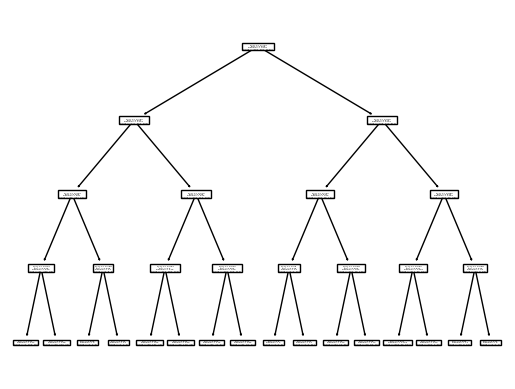

In [48]:
# Determine best combination of Hyper Parameters -- abalone Data
# Pass the Parameters and model to GridSearchCV
grid_search_abalone = GridSearchCV(tree.DecisionTreeClassifier(),tree_param)
# Fit the Model to the Training Data
grid_search_abalone.fit(abalone_x_train,abalone_y_train)
# Get the best estimate
best_dt = grid_search_abalone.best_estimator_
# Plot the tree
tree.plot_tree(best_dt)

In [99]:
# Intialize the MLP CLassfier for penguin Data
mlp_classifier_penguin = MLPClassifier(hidden_layer_sizes=(100,100),activation='logistic',solver='sgd')
mlp_classifier_penguin = mlp_classifier_penguin.fit(penguin_x_train,pengiun_y_train)

# Intialize the MLP Classifier for Abalone Data
mlp_classifier_abalone = MLPClassifier(hidden_layer_sizes=(100,100),activation='logistic',solver='sgd')
mlp_classifier_abalone = mlp_classifier_abalone.fit(abalone_x_train,abalone_y_train)

In [100]:
# Intialize TOP-MLP Params for Penguin Data
top_mlp_params = {'activation': ['logistic', 'tanh', 'relu'],'hidden_layer_sizes': [(30, 50), (10, 10, 10)],'solver': ['adam', 'sgd']}
# Intialize the GridSearchCV
mlp_grid_search_penguin = GridSearchCV(MLPClassifier(),top_mlp_params)
# Fit the Model to the Training Data
mlp_grid_search_penguin.fit(penguin_x_train,pengiun_y_train)



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

In [101]:
# Intialize the GridSearchCV
mlp_grid_search_abalone = GridSearchCV(MLPClassifier(),top_mlp_params)
# Fit the Model to the Training Data
mlp_grid_search_abalone.fit(abalone_x_train,abalone_y_train)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

In [55]:
def writeToPenguinFile(str):
    with open('penguin-performance.txt', 'a') as file:
        file.write(str)
    

In [67]:
# Test the Base-DT with the test Data
penguin_y_pred = dtc_penguin.predict(penguin_x_test)

#Wrtie the output to the txt file
writeToPenguinFile("----------------BASE-DT------------------ \n")
writeToPenguinFile("Confusion Matrix \n")
print("Confusion Matrix")
writeToPenguinFile(str(confusion_matrix(penguin_y_test, penguin_y_pred)) + "\n")
print(confusion_matrix(penguin_y_test, penguin_y_pred))
writeToPenguinFile("Classification Report for the Model \n")
writeToPenguinFile(str(classification_report(penguin_y_test, penguin_y_pred)))



Confusion Matrix
[[33  0  1]
 [ 1 21  0]
 [ 0  0 28]]


In [73]:
# Test the TOP-DT with the Test Data
penguin_y_pred = grid_search_penguin.best_estimator_.predict(penguin_x_test)

#Wrtie the output to the txt file
writeToPenguinFile(f"----------------TOP-DT Best Params {grid_search_penguin.best_params_}------------------ \n")
writeToPenguinFile("Confusion Matrix \n")
print("Confusion Matrix")
writeToPenguinFile(str(confusion_matrix(penguin_y_test, penguin_y_pred)) + "\n")
print(confusion_matrix(penguin_y_test, penguin_y_pred))
writeToPenguinFile("Classification Report for the Model \n")
writeToPenguinFile(str(classification_report(penguin_y_test, penguin_y_pred)))



['Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap'
 'Chinstrap' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo']
Confusion Matrix
[[33  0  1]
 [ 1 21  0]
 [ 0  0 28]]


In [95]:
# Test The MLP with the test Data
penguin_y_pred = mlp_classifier_penguin.predict(penguin_x_test)


print(penguin_y_pred)
# Write the output to the txt file
writeToPenguinFile(f"----------------MLP Best Params {grid_search_penguin.best_params_}------------------ \n")
writeToPenguinFile("Confusion Matrix \n")
print("Confusion Matrix")
writeToPenguinFile(str(confusion_matrix(penguin_y_test, penguin_y_pred)) + "\n")
print(confusion_matrix(penguin_y_test, penguin_y_pred))
writeToPenguinFile("Classification Report for the Model \n")
writeToPenguinFile(str(classification_report(penguin_y_test, penguin_y_pred)))


['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie']
Confusion Matrix
[[34  0  0]
 [22  0  0]
 [28  0  0]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# Test The MLP with the test Data
penguin_y_pred = mlp_grid_search_penguin.predict(penguin_x_test)

# Write the output to the txt file
writeToPenguinFile(f"----------------MLP Best Params {mlp_grid_search_penguin.best_params_}------------------ \n")
writeToPenguinFile("Confusion Matrix \n")
print("Confusion Matrix")
writeToPenguinFile(str(confusion_matrix(penguin_y_test, penguin_y_pred)) + "\n")
print(confusion_matrix(penguin_y_test, penguin_y_pred))
writeToPenguinFile("Classification Report for the Model \n")
writeToPenguinFile(str(classification_report(penguin_y_test, penguin_y_pred)))


Confusion Matrix
[[34  0  0]
 [22  0  0]
 [28  0  0]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
